In [1]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading of dataset
df=pd.read_excel('Amazon_kindle_review  1.xlsx')
df

Unnamed: 0  Unnamed: 1                                         reviewText
0             0         NaN  This book was the very first bookmobile book I...
1             1         NaN  When I read the description for this book, I c...
2             2         NaN  I just had to edit this review. This book is a...
3             3         NaN  I don't normally buy 'mystery' novels because ...
4             4         NaN  This isn't the kind of book I normally read, a...
..          ...         ...                                                ...
744         744         NaN  I would definitely recommend, it is fast paced...
745         745         NaN  I read the blurb and the book sounded like my ...
746         746         NaN  I thought this book was fun, short and sweet. ...
747         747         NaN  This is a very good case for the kindle DX. No...
748         748         NaN  An intriguing very short story bringing a new ...

[749 rows x 3 columns]

In [3]:
df.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
df

reviewText
0    This book was the very first bookmobile book I...
1    When I read the description for this book, I c...
2    I just had to edit this review. This book is a...
3    I don't normally buy 'mystery' novels because ...
4    This isn't the kind of book I normally read, a...
..                                                 ...
744  I would definitely recommend, it is fast paced...
745  I read the blurb and the book sounded like my ...
746  I thought this book was fun, short and sweet. ...
747  This is a very good case for the kindle DX. No...
748  An intriguing very short story bringing a new ...

[749 rows x 1 columns]

In [4]:
df.isnull().sum()

reviewText    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  749 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [6]:
df = [reviewText.strip() for reviewText in df.reviewText] # remove both the leading and the trailing characters
df = [reviewText for reviewText in df if reviewText] # removes empty strings, because they are considered in Python as False
df[0:10] 

['This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.',
 "When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered a child 5 yea

In [7]:
# Joining the list into one string/text
df_text=' '.join(df)
df_text

'This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories. When I read the description for this book, I couldn\'t wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect\'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered a child 5 years 

In [8]:
# Remove Punctuations 
no_punc_text=df_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'This book was the very first bookmobile book I bought when I was in the school book club I loved the story then and I bet a dollar to a donut I will love it again If my memory serves I bought this book in 5th grade That would have been about 1961 I am looking forward to reliving the memories When I read the description for this book I couldnt wait to read it Once I downloaded it to my Kindle I found it extremely hard to keep reading it  To be honest I stopped reading halfway through the book It began slow and remained a slow uninteresting read  It lacked passion not making love passion but passion for life Neither Jada or Aaron were interesting characters and the story was too too everything is perfect  Everybody is just so understanding and accommodatingthe bit of drama with his father and her grandmother was blah  To give an example of what I mean and there are MANY Aaron finally finds out almost  half way into the book that he fathered a child 5 years agokeep in mind that Aaron and

In [9]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['This', 'book', 'was', 'the', 'very', 'first', 'bookmobile', 'book', 'I', 'bought', 'when', 'I', 'was', 'in', 'the', 'school', 'book', 'club', 'I', 'loved', 'the', 'story', 'then', 'and', 'I', 'bet', 'a', 'dollar', 'to', 'a', 'donut', 'I', 'will', 'love', 'it', 'again', 'If', 'my', 'memory', 'serves', 'I', 'bought', 'this', 'book', 'in', '5th', 'grade', 'That', 'would', 'have']


In [11]:
len(text_tokens)

77594

In [12]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['This', 'book', 'first', 'bookmobile', 'book', 'bought', 'school', 'book', 'club', 'loved', 'story', 'bet', 'dollar', 'donut', 'love', 'If', 'memory', 'serves', 'bought', 'book', '5th', 'grade', 'That', 'would', '1961', 'looking', 'forward', 'reliving', 'memories', 'When', 'read', 'description', 'book', 'couldnt', 'wait', 'read', 'Once', 'downloaded', 'Kindle', 'found']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Normalize the data
lower_words=[reviewText.lower() for reviewText in no_stop_tokens]
print(lower_words[0:40])

['this', 'book', 'first', 'bookmobile', 'book', 'bought', 'school', 'book', 'club', 'loved', 'story', 'bet', 'dollar', 'donut', 'love', 'if', 'memory', 'serves', 'bought', 'book', '5th', 'grade', 'that', 'would', '1961', 'looking', 'forward', 'reliving', 'memories', 'when', 'read', 'description', 'book', 'couldnt', 'wait', 'read', 'once', 'downloaded', 'kindle', 'found']


In [14]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['thi', 'book', 'first', 'bookmobil', 'book', 'bought', 'school', 'book', 'club', 'love', 'stori', 'bet', 'dollar', 'donut', 'love', 'if', 'memori', 'serv', 'bought', 'book', '5th', 'grade', 'that', 'would', '1961', 'look', 'forward', 'reliv', 'memori', 'when', 'read', 'descript', 'book', 'couldnt', 'wait', 'read', 'onc', 'download', 'kindl', 'found']


In [15]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

this book first bookmobile book bought school book club loved story bet dollar donut love if memory serves bought book 5th grade that would 1961 looking forward reliving memories when read description book couldnt wait read once downloaded kindle found extremely hard keep reading to honest stopped reading halfway book began slow remained slow uninteresting read lacked passion making love passion passion life neither jada aaron interesting characters story everything perfect everybody understanding accommodatingthe bit drama father grandmother blah to give example mean many aaron finally finds almost half way book fathered child 5 years agokeep mind aaron jada kept contact months left never mentioned pregnant when finally tells son aaron becomes overwhelmed emotions misty eyed knowing hes father wth think men would upsetangry know child woman love never told not book goodall well no passion omg dont let get started scene father son finally meet top made want barf maybe scene towards beg

In [16]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['this', 'book', 'first', 'bookmobile', 'book', 'buy', 'school', 'book', 'club', 'love', 'story', 'bet', 'dollar', 'donut', 'love', 'if', 'memory', 'serve', 'buy', 'book', '5th', 'grade', 'that', 'would', '1961', 'look', 'forward', 'relive', 'memory', 'when', 'read', 'description', 'book', 'could', 'nt', 'wait', 'read', 'once', 'download', 'kindle', 'find', 'extremely', 'hard', 'keep', 'read', 'to', 'honest', 'stop', 'read', 'halfway', 'book', 'begin', 'slow', 'remain', 'slow', 'uninteresting', 'read', 'lack', 'passion', 'make', 'love', 'passion', 'passion', 'life', 'neither', 'jada', 'aaron', 'interesting', 'character', 'story', 'everything', 'perfect', 'everybody', 'understand', 'accommodatingthe', 'bit', 'drama', 'father', 'grandmother', 'blah', 'to', 'give', 'example', 'mean', 'many', 'aaron', 'finally', 'find', 'almost', 'half', 'way', 'book', 'father', 'child', '5', 'year', 'agokeep', 'mind', 'aaron', 'jada', 'keep', 'contact', 'month', 'leave', 'never', 'mention', 'pregnant', 'w

In [17]:
clean_reviews=' '.join(lemmas)
clean_reviews

'this book first bookmobile book buy school book club love story bet dollar donut love if memory serve buy book 5th grade that would 1961 look forward relive memory when read description book could nt wait read once download kindle find extremely hard keep read to honest stop read halfway book begin slow remain slow uninteresting read lack passion make love passion passion life neither jada aaron interesting character story everything perfect everybody understand accommodatingthe bit drama father grandmother blah to give example mean many aaron finally find almost half way book father child 5 year agokeep mind aaron jada keep contact month leave never mention pregnant when finally tell son aaron become overwhelmed emotion misty eyed know he s father wth think man would upsetangry know child woman love never tell not book goodall well no passion omg do nt let get start scene father son finally meet top make want barf maybe scene towards begin book would touch in middle book much blah ma

## Feature Extaction

### 1. Using CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [19]:
print(cv.vocabulary_)

{'this': 6550, 'book': 870, 'first': 2515, 'bookmobile': 885, 'buy': 1047, 'school': 5677, 'club': 1302, 'love': 3922, 'story': 6219, 'bet': 772, 'dollar': 1948, 'donut': 1962, 'if': 3220, 'memory': 4136, 'serve': 5786, '5th': 129, 'grade': 2829, 'that': 6501, 'would': 7258, '1961': 39, 'look': 3892, 'forward': 2622, 'relive': 5379, 'when': 7125, 'read': 5267, 'description': 1780, 'could': 1525, 'nt': 4510, 'wait': 7019, 'once': 4583, 'download': 1982, 'kindle': 3655, 'find': 2499, 'extremely': 2364, 'hard': 2952, 'keep': 3624, 'to': 6623, 'honest': 3128, 'stop': 6207, 'halfway': 2922, 'begin': 731, 'slow': 5976, 'remain': 5382, 'uninteresting': 6850, 'lack': 3703, 'passion': 4782, 'make': 4002, 'life': 3822, 'neither': 4399, 'jada': 3511, 'aaron': 151, 'interesting': 3406, 'character': 1188, 'everything': 2289, 'perfect': 4827, 'everybody': 2286, 'understand': 6819, 'accommodatingthe': 187, 'bit': 805, 'drama': 1996, 'father': 2433, 'grandmother': 2840, 'blah': 814, 'give': 2775, 'exa

In [23]:
print(cv.get_feature_names_out()[150:300])

['aa' 'aaron' 'aback' 'abandon' 'abberation' 'abbreviation' 'abby' 'abide'
 'ability' 'abject' 'ablaze' 'able' 'abound' 'about' 'aboutpart'
 'aboutsasha' 'aboutthe' 'above' 'abrupt' 'abruptly' 'absence' 'absolute'
 'absolutely' 'absorb' 'abstinence' 'abundance' 'abundant' 'abuse'
 'abusive' 'abysmal' 'accept' 'acceptable' 'acceptance' 'access'
 'accident' 'accidental' 'accidentally' 'accommodatingthe' 'accompany'
 'accomplish' 'accord' 'according' 'account' 'accountant' 'accounting'
 'accurate' 'accurately' 'accuse' 'accustom' 'achieve' 'acidic'
 'acknowledge' 'acquaintance' 'acquiesce' 'across' 'acrossit' 'act'
 'acting' 'action' 'actionms' 'actionnice' 'actionsuspense' 'actitude'
 'actively' 'activist' 'activity' 'actor' 'actual' 'actually' 'ad' 'adam'
 'adamant' 'adamsbut' 'adamsesque' 'adapt' 'adapter' 'add' 'addicted'
 'addictinglooking' 'addiction' 'addictive' 'addition' 'additional'
 'additionally' 'address' 'adept' 'adequate' 'adjective' 'adjust'
 'admiral' 'admire' 'admit' 'ad

In [24]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviewscv.toarray().shape)

(41656, 7331)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['also' 'and' 'another' 'author' 'back' 'bad' 'be' 'bit' 'book' 'but' 'ca'
 'character' 'come' 'could' 'did' 'do' 'end' 'enjoy' 'enough' 'even'
 'feel' 'find' 'first' 'friend' 'get' 'give' 'go' 'good' 'great' 'happen'
 'have' 'he' 'hot' 'if' 'interesting' 'its' 'keep' 'kindle' 'know' 'leave'
 'life' 'like' 'little' 'long' 'look' 'lot' 'love' 'make' 'man' 'many'
 'much' 'need' 'never' 'new' 'next' 'novel' 'nt' 'old' 'one' 'plot' 'read'
 'really' 'recommend' 'relationship' 'review' 'romance' 'say' 'scene'
 'see' 'seem' 'series' 'sex' 'she' 'short' 'something' 'star' 'start'
 'still' 'story' 'take' 'there' 'thing' 'think' 'this' 'though' 'time'
 'try' 'turn' 'two' 'use' 'want' 'way' 'well' 'woman' 'work' 'world'
 'would' 'write' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


## Generate Word Cloud

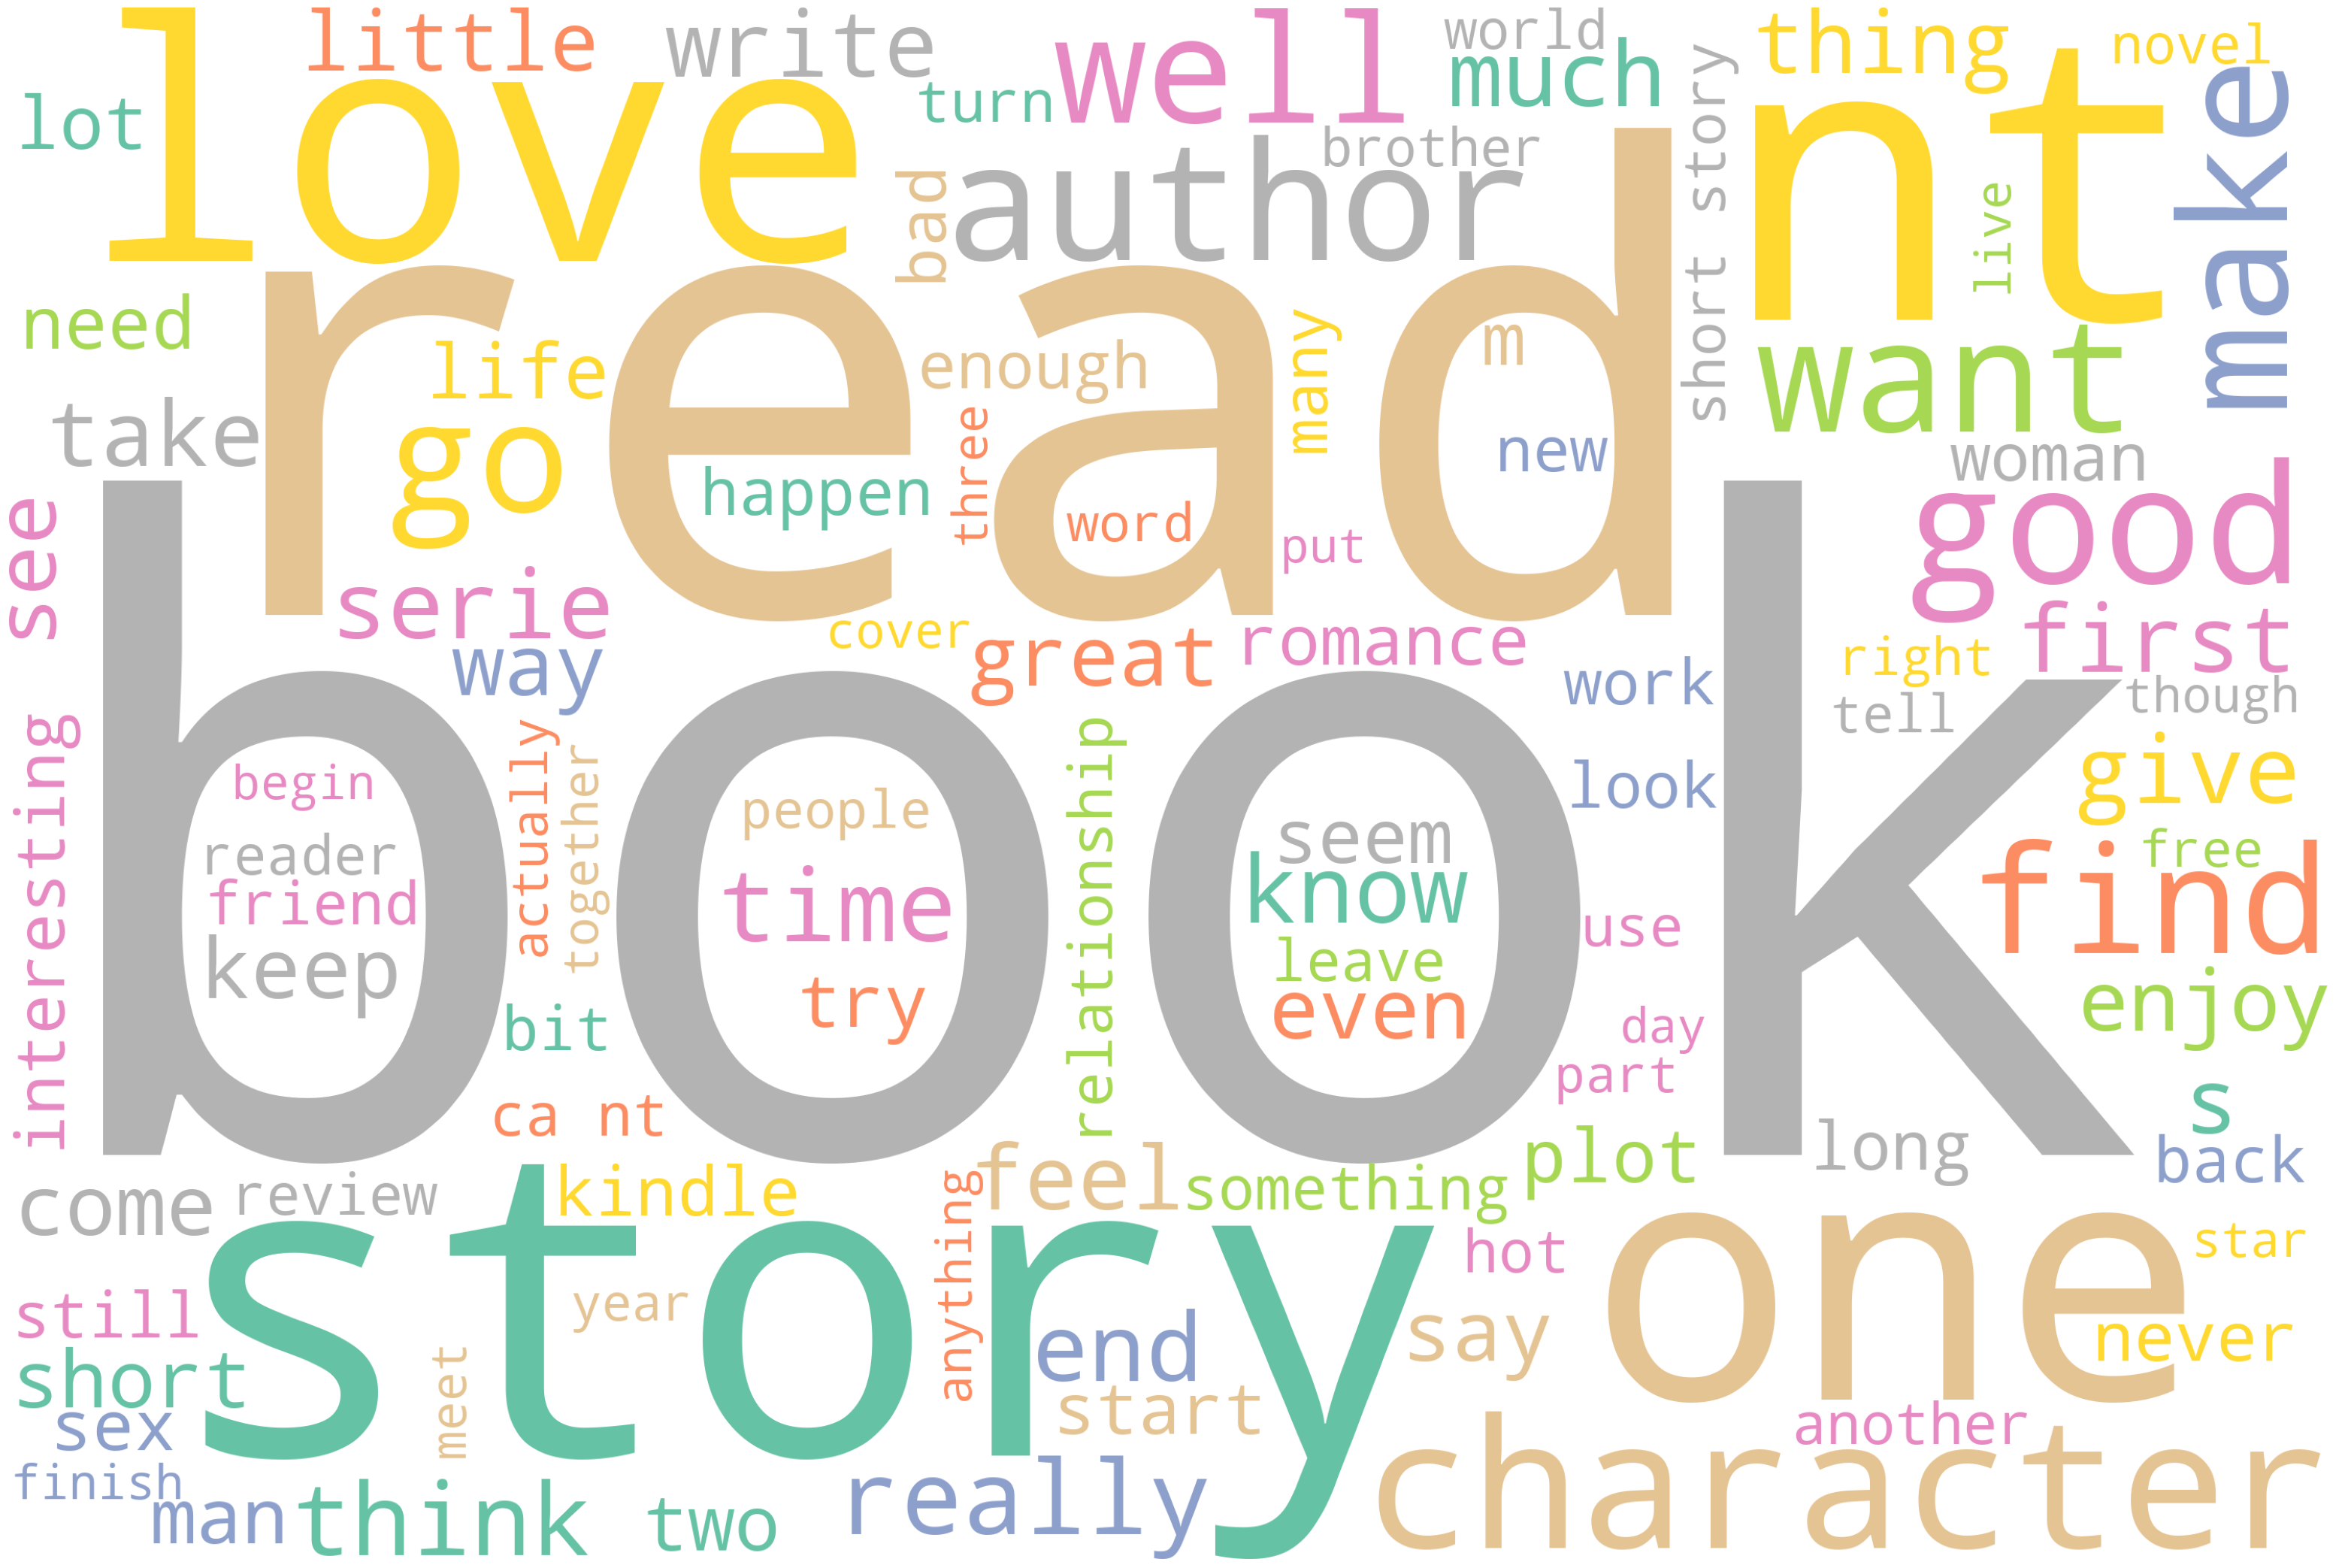

In [28]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [29]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [30]:
for token in doc_block[100:200]:
    print(token,token.pos_)

keep VERB
contact NOUN
month NOUN
leave VERB
never ADV
mention VERB
pregnant ADJ
when SCONJ
finally ADV
tell VERB
son NOUN
aaron PROPN
become VERB
overwhelmed ADJ
emotion NOUN
misty PROPN
eyed PROPN
know VERB
he PRON
s VERB
father PROPN
wth PROPN
think VERB
man NOUN
would AUX
upsetangry ADJ
know VERB
child NOUN
woman NOUN
love NOUN
never ADV
tell VERB
not PART
book NOUN
goodall NOUN
well INTJ
no DET
passion NOUN
omg NOUN
do AUX
nt PART
let VERB
get AUX
start VERB
scene PROPN
father PROPN
son NOUN
finally ADV
meet VERB
top ADJ
make NOUN
want VERB
barf NOUN
maybe ADV
scene NOUN
towards AUX
begin VERB
book NOUN
would AUX
touch VERB
in ADP
middle ADJ
book NOUN
much ADV
blah INTJ
make VERB
throw VERB
kindle NOUN
like INTJ
eat VERB
sweet ADJ
dessert NOUN
sweet ADJ
make VERB
tooth NOUN
hurt VERB
this DET
book NOUN
good ADJ
theme NOUN
followthrough NOUN
also ADV
believe VERB
jada PROPN
graduate PROPN
harvard PROPN
let VERB
reflect VERB
speech NOUN
job NOUN
be AUX
tell VERB
wonderful ADJ
person

In [31]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['hurt', 'book', 'theme', 'followthrough', 'believe', 'let', 'reflect', 'speech', 'job', 'tell', 'personality', 'cause', 'aaron', 'fall', 'see', 'author', 'describe', 'depress', 'believe', 'heartbeat', 'bore', 'book', 'frustrating', 'read', 'struggle', 'read', 'stop', 'torture', 'realize', 'go', 'get', 'edit', 'review', 'book', 'believe', 'get', 'update', 'rewrite', 'get', 'version', 'move', 'favorite', 'bechett', 'herodaydream', 'induce', 'gentsdidnt', 'expect', 'seem', 'debauch', 'love', 'matter', 'fact', 'm', '21well', 'battery', 'deadnow', 'know', 'broaden', 'reading', 'taste', 'buy', 'write', 'keeper', 'supply', 'batteriesand', 'cover', 'hunk', 'match', 'description', 'guy', 'read', 'love', 'character', 'study', 'ending', 's', 'go', 'bring', 'meat', 'week', 'seem', 'wastrel', 's', 'deal', 'time', 'war', 'hero', 's', 'home', 'crusade', 'think', 'survive', 'king', 'reward', 's', 'love', 'enjoyin', 'life', 'hell', 'm']


In [32]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0       book    908
1      story    623
2       read    591
3  character    319
4       love    291
5        get    288
6     author    220
7       want    209
8       make    202
9       time    194

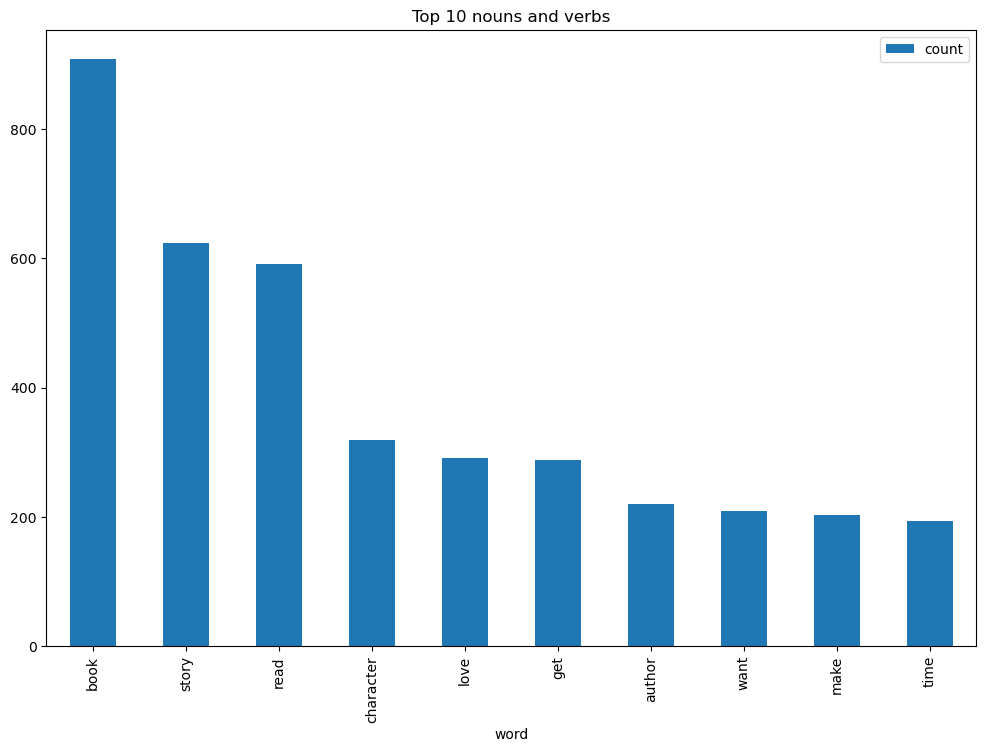

In [33]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(df))
sentences

['This book was the very first bookmobile book I bought when I was in the school book club.',
 'I loved the story then and I bet a dollar to a donut I will love it again.',
 'If my memory serves, I bought this book in 5th grade.',
 'That would have been about 1961.',
 'I am looking forward to reliving the memories.',
 "When I read the description for this book, I couldn't wait to read it.",
 'Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.',
 'To be honest, I stopped reading halfway through the book.',
 'It began slow and remained a slow, uninteresting read.',
 'It lacked passion; not making love passion, but passion for life.',
 "Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.",
 'Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.',
 'To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     This book was the very first bookmobile book I...
1     I loved the story then and I bet a dollar to a...
2     If my memory serves, I bought this book in 5th...
3                      That would have been about 1961.
4        I am looking forward to reliving the memories.
...                                                 ...
4258  No it is not hard but it will protect from tho...
4259  More important it will keep your kindle warm i...
4260           Cold and electronics do not play nicely.
4261  An intriguing very short story bringing a new ...
4262  My only regret is it is to short hopefully the...

[4263 rows x 1 columns]

In [37]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [38]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [40]:
# manual testing
calculate_sentiment(text='good service')

3

In [41]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       6
2       0
3       0
4       0
       ..
4258    0
4259    2
4260    0
4261   -1
4262    0
Name: sentiment_value, Length: 4263, dtype: int64

In [42]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       18
1       18
2       11
3        6
4        8
        ..
4258    22
4259    23
4260     7
4261    11
4262    16
Name: word_count, Length: 4263, dtype: int64

In [43]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
1526  It wasn't focused on for long, but that there ...              -15   
684   In this, slice of real hell and torture that h...              -11   
3292  However, it was too much of the same old same ...              -10   
2717  Characters behave in a way that is quite reaso...               -9   
3331  Especially being it is the women calling each ...               -9   
...                                                 ...              ...   
3656  Part of the fun of reading a book like this is...               15   
4193  Love it wonderful romance book thrilling to th...               15   
2872  I also love that even though the romance was d...               19   
268   This is a wonderful,sweet story of fairy tales...               21   
1897  IT WAS FREE READ SOME OF THE REVIEWS AND TOOK ...               33   

      word_count  
1526          89  
684           38  
3292          54  
2717          29  
3331          12  
...          ...  
3656          61  
4193          33  
2872          67  
268           74  
1897         179  

[4263 rows x 3 columns]

In [44]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    4263.000000
mean        1.157870
std         2.963835
min       -15.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        33.000000
Name: sentiment_value, dtype: float64

In [45]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     This book was the very first bookmobile book I...                0   
2     If my memory serves, I bought this book in 5th...                0   
3                      That would have been about 1961.                0   
4        I am looking forward to reliving the memories.                0   
5     When I read the description for this book, I c...                0   
...                                                 ...              ...   
4253                                   Just my opinion.                0   
4258  No it is not hard but it will protect from tho...                0   
4260           Cold and electronics do not play nicely.                0   
4261  An intriguing very short story bringing a new ...               -1   
4262  My only regret is it is to short hopefully the...                0   

      word_count  
0             18  
2             11  
3              6  
4              8  
5             14  
...          ...  
4253           3  
4258          22  
4260           7  
4261          11  
4262          16  

[2218 rows x 3 columns]

In [46]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
1     I loved the story then and I bet a dollar to a...                6   
7     To be honest, I stopped reading halfway throug...                1   
9     It lacked passion; not making love passion, bu...                1   
10    Neither Jada or Aaron were interesting charact...                5   
16    Not in this book; it's all good--all is well; ...                2   
...                                                 ...              ...   
4254             Maybe you will love it as others have.                3   
4255      I thought this book was fun, short and sweet.                6   
4256  Not an in-depth story line but sometimes I don...                1   
4257        This is a very good case for the kindle DX.                3   
4259  More important it will keep your kindle warm i...                2   

      word_count  
1             18  
7             10  
9             11  
10            16  
16            11  
...          ...  
4254           8  
4255           9  
4256          18  
4257          10  
4259          23  

[2045 rows x 3 columns]

In [47]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     This book was the very first bookmobile book I...                0   
1     I loved the story then and I bet a dollar to a...                6   
2     If my memory serves, I bought this book in 5th...                0   
3                      That would have been about 1961.                0   
4        I am looking forward to reliving the memories.                0   
...                                                 ...              ...   
4258  No it is not hard but it will protect from tho...                0   
4259  More important it will keep your kindle warm i...                2   
4260           Cold and electronics do not play nicely.                0   
4261  An intriguing very short story bringing a new ...               -1   
4262  My only regret is it is to short hopefully the...                0   

      word_count  index  
0             18      0  
1             18      1  
2             11      2  
3              6      3  
4              8      4  
...          ...    ...  
4258          22   4258  
4259          23   4259  
4260           7   4260  
4261          11   4261  
4262          16   4262  

[4263 rows x 4 columns]

<Axes: xlabel='sentiment_value', ylabel='Density'>

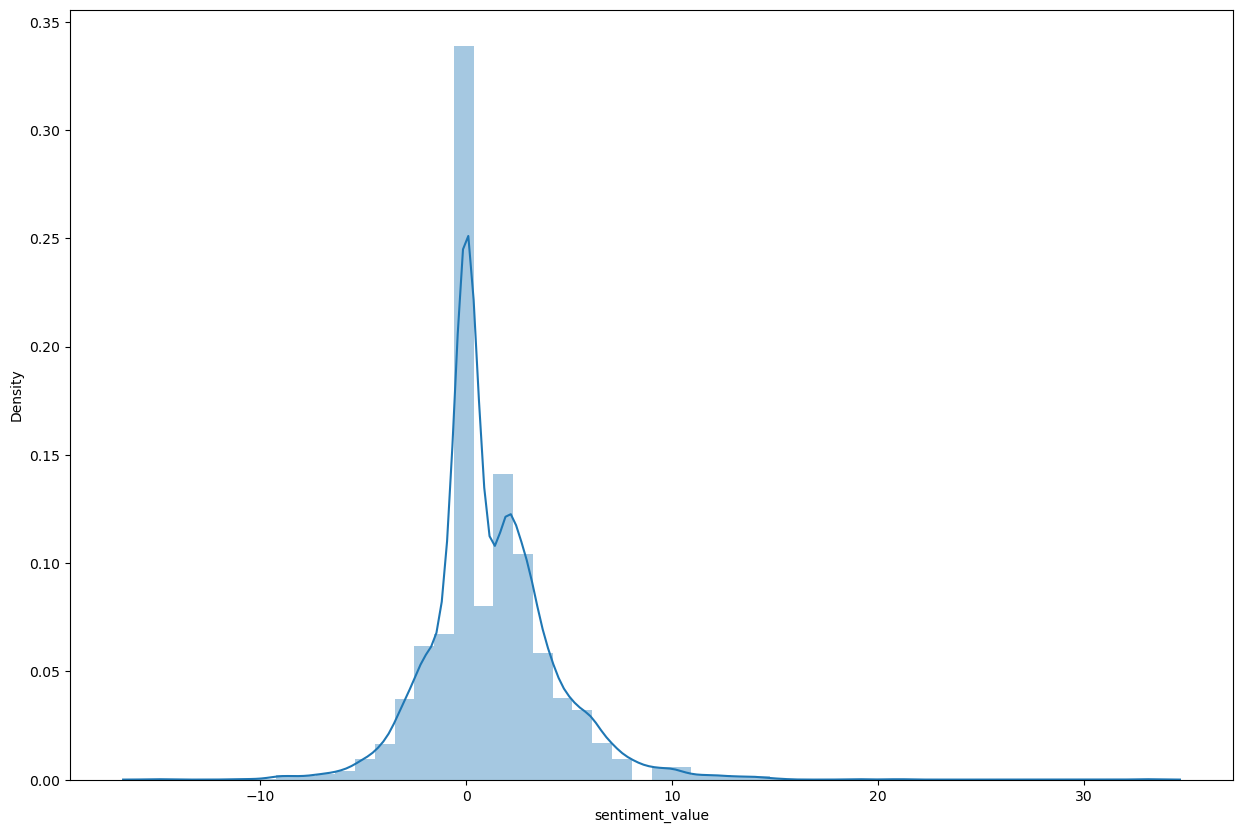

In [48]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

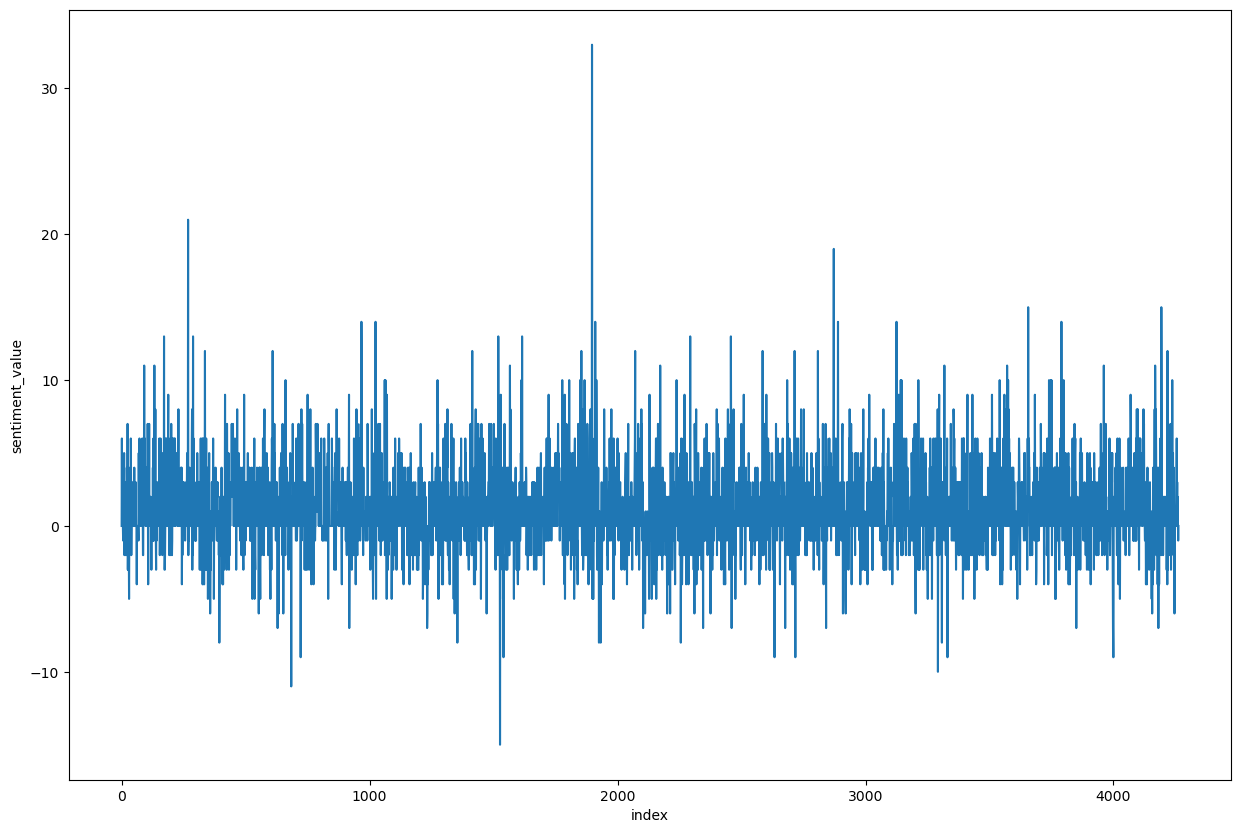

In [49]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)